# Tarea 3: Machine Learning
### Universidad de Valparaíso
### Alumno: Bastián Barraza
### Profesor: Alejandro Pereira

# Introducción

La enfermedad cardíaca es una de las principales causas de mortalidad en todo el mundo, y la identificación temprana de sus síntomas es crucial para un tratamiento efectivo. La presencia de angina inducida por ejercicio puede ser un indicador de un flujo sanguíneo insuficiente hacia el corazón debido a obstrucciones en las arterias coronarias. Por ello, la aplicación de algoritmos de clasificación para detectar la presencia de angina inducida por ejercicio permite una detección temprana de problemas cardiovasculares y puede conducir a la implementación de medidas preventivas y terapéuticas adecuadas para reducir el riesgo de eventos cardíacos graves, como infarto de miocardio o angina inestable.

En este contexto, el presente trabajo se centra en la aplicación de técnicas de machine learning para construir un clasificador capaz de predecir la variable "exang" (angina inducida por ejercicio) en pacientes con enfermedad cardíaca. Específicamente, se aplican y analizan el rendimiento de los modelos de Regresión Logística, Naive Bayes, Support Vector Classifier (SVC), Linear Discriminant Analysis (LDA) y Quadratic Discriminant Analysis (QDA).

Además, se evalúa el desempeño del clasificador utilizando métricas de evaluación, como exactitud (accuracy), precisión, recall y puntuación F1. También se comparan las curvas ROC, las curvas de precisión-recall y las tasas de aprendizaje de cada uno de los clasificadores.

## Ejercicio: 
**Comparar regression logística, SVM, Naïve Bayes, LDA y QDA usando las métricas de desmpeño correspondientes. Hacer un código con comentarios y analysis.**

### Variable de respuesta:
- exang: angina inducida por ejercicio (1 = sí; 0 = no)

### Variables a explicatorias:
- edad: edad en años
- sexo: sexo (1 = masculino; 0 = femenino)
- cp: tipo de dolor de pecho (1: angina típica; 2: angina atípica; 3: dolor no anginoso; 4: asintomático)
- trestbps: presión arterial en reposo (en mm Hg al ingreso al hospital)
- col: colesterol sérico en mg/dl
- fbs: (azúcar en sangre en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)
- restecg: resultados electrocardiográficos en reposo (0: normal; 1: presenta anormalidad en la onda ST-T (inversiones de onda T y/o elevación o depresión de ST > 0.05 mV); 2: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes)

- thalach: frecuencia cardíaca máxima alcanzada
- oldpeak: depresión del segmento ST inducida por el ejercicio en relación al reposo


# Metodología

Para llevar a cabo este estudio, en primer lugar se importan las librerías que se utilizarán, como pandas, matplotlib, numpy, seaborn y scikit-learn, entre otras. A continuación, se realiza la limpieza de los datos con el fin de garantizar la calidad y confiabilidad de los mismos en el análisis y construcción del clasificador. Posteriormente, se definen las variables de respuesta y explicativas, separándolas en categorías numéricas y categóricas, y aplicando el tratamiento correspondiente a cada una.

Una vez definidas las variables de estudio, se crea una función para automatizar la aplicación de los clasificadores y obtener métricas para evaluar su rendimiento. En esta función, se realiza la escala de los datos utilizando un método estándar para las variables numéricas y un codificador One Hot para transformar las variables categóricas. Esto se logra mediante el uso de la función ColumnTransformer de scikit-learn. A continuación, se aplican los cinco clasificadores seleccionados y se calculan diversas métricas para medir su desempeño. Además, se obtienen los valores de la matriz de confusión, la curva ROC, la curva de precisión-recall y la tasa de aprendizaje de cada modelo.

Dado que Naive Bayes estima directamente las probabilidades de pertenencia a cada clase, mientras que los demás clasificadores, como Logistic Regression, Support Vector Machines (SVM) y Linear Discriminant Analysis (LDA), utilizan enfoques diferentes, los puntajes utilizados para calcular la curva ROC y la curva Precision-Recall en Naive Bayes son distintos a los de los demás clasificadores.

## Librerías a utilizar

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn import metrics as sk_metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from scipy.special import expit

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/bastianbm7/Machine-Learning-Course/main/Data/data.csv")

## Limpieza de datos:

En esta sección, se realiza la etapa de limpieza de datos con el objetivo de asegurar la calidad y confiabilidad de los datos utilizados en el análisis y construcción del clasificador. Para lograrlo, se llevan a cabo las siguientes tareas:

1) **Renombrar columnas:** Se asignan nombres descriptivos a las columnas para facilitar su interpretación y comprensión.

2) **Reemplazar valores mal ingresados:** Se identifican y corrigen los valores que han sido ingresados incorrectamente, asegurando la coherencia y consistencia de los datos.

3) **Eliminar columnas no utilizadas:** Se eliminan aquellas columnas que no aportan información relevante para el análisis y construcción del clasificador, reduciendo la dimensionalidad del conjunto de datos.

4) **Eliminar valores perdidos:** Se identifican y eliminan los registros que contienen valores faltantes o perdidos, evitando posibles sesgos o distorsiones en el análisis.

5) **Chequeo de tipos de datos:** Se verifica que los tipos de datos de las variables sean correctos y coherentes con su naturaleza, realizando conversiones si es necesario.

In [4]:
# Renombrar la columna 'num       ' a 'attack'
df.rename(columns={'num       ': 'attack'}, inplace=True)

# Reemplazar los valores '?' por NaN en todo el DataFrame
df.replace("?", np.nan, inplace=True)

# Eliminar las columnas 'slope', 'ca' y 'thal' del DataFrame
df.drop(columns=['slope', 'ca', 'thal'], inplace=True)

# Eliminar las filas que contienen valores NaN en el DataFrame
df.dropna(inplace=True)

In [5]:
# conversión de varias columnas específicas del df al tipo de dato float
df['trestbps'] = df['trestbps'].astype(float)
df['chol'] = df['chol'].astype(float)
df['fbs'] = df['fbs'].astype(float)
df['restecg'] = df['restecg'].astype(float)
df['thalach'] = df['thalach'].astype(float)
df['exang'] = df['exang'].astype(float)

In [6]:
# Valores perdidos:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
attack      0
dtype: int64

In [7]:
# Obtener las dimensiones del DataFrame después de realizar las operaciones anteriores
df.shape

(261, 11)

In [8]:
# Información de los tipos de datos del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       261 non-null    int64  
 1   sex       261 non-null    int64  
 2   cp        261 non-null    int64  
 3   trestbps  261 non-null    float64
 4   chol      261 non-null    float64
 5   fbs       261 non-null    float64
 6   restecg   261 non-null    float64
 7   thalach   261 non-null    float64
 8   exang     261 non-null    float64
 9   oldpeak   261 non-null    float64
 10  attack    261 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 24.5 KB


Notamos que no existen luego de realizar la limpieza, no existen datos perdidos y todos los datos tienen una estructura consistente. 

## Definir variables

Ahora, se busca separar el conjunto de datos en una variable de respuesta y variables explicativas. La variable de respuesta que se analiza es la presencia de angina después de realizar ejercicio físico, denominada 'exang' en el conjunto de datos. 

Luego, se identifican las variables numéricas y categóricas que se utilizarán en el estudio. Las variables numéricas, como edad, presión arterial en reposo, colesterol, frecuencia cardíaca máxima alcanzada y depresión del segmento ST inducida por el ejercicio, proporcionan medidas cuantitativas relacionadas con la condición cardíaca de los pacientes. Por otro lado, se consideran las variables categóricas, como género, tipo de dolor en el pecho, nivel de azúcar en la sangre en ayunas, resultado del electrocardiograma en reposo y presencia de enfermedad cardíaca. 

In [9]:
y = df['exang']
X = df.drop(['exang'], axis=1)
numericCols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categoricalCols = ['sex', 'cp', 'fbs', 'restecg', 'attack']

## Escalar datos

Luego, se busca estandarizar los datos. Este paso puede mejorar la interpretación de los datos y resulta útil para reducir la influencia de valores atípicos, así como para mejorar la comparabilidad entre diferentes variables en el conjunto de datos.

En este caso, se utiliza la función ColumnTransformer para aplicar un escalado estándar a las variables numéricas y un codificador One Hot para las variables categóricas. El escalado estándar permite que las variables numéricas tengan una distribución con media cero y desviación estándar uno, lo cual ayuda a que los modelos de aprendizaje automático trabajen de manera más efectiva. Por otro lado, el codificador One Hot convierte las variables categóricas en múltiples variables binarias, lo que permite que los algoritmos interpreten y utilicen adecuadamente estas variables en el análisis.

## Aplicación de los clasificadores

En la siguiente función, se realiza un proceso completo que involucra el escalamiento de los datos, la aplicación de diferentes clasificadores y la obtención de métricas para evaluar su desempeño. Una vez que se ha aplicado la función a cada clasificador, se genera la matriz de confusión correspondiente. 

In [10]:
def applyClassificator(X, y, numerical_columns, caterogical_columns, classifier_name):
    """
    Esta función sirve para automatizar el escalado de los datos,
    aplicar un clasificador y devolver las métricas de evaluación.

    Parámetros de entrada:
    - X: matriz de características (features) de entrada.
    - y: vector de etiquetas de clase correspondientes a las muestras de X.
    - numerical_columns: lista de nombres de variables numéricas de X
    - caterogical_columns: lista de nombres de variables categóricas de X
    - classifier_name: nombre del clasificador a utilizar.

    Salida:
    - df_metrics: dataframe con las métricas de evaluación del clasificador.
    - cm_df: dataframe con la matriz de confusión.
    - df_learning_curve: dataframe con la curva de aprendizaje del clasificador.
    - df_roc: dataframe con la curva ROC.
    - df_prc: dataframe con la curva de precision-recall.
    """
    
    # Definir las transformaciones para cada tipo de columna
    transformations = [
        ('onehot', OneHotEncoder(), caterogical_columns),  # Aplicar one-hot encoding a la columna 'Columna2'
        ('scaler', StandardScaler(), numerical_columns)  # Aplicar escalado a las columnas 'Columna1' y 'Columna3'
    ]
    
    # Crear el ColumnTransformer
    ct = ColumnTransformer(transformations)
    
    X_scaled = ct.fit_transform(X)
    
    ####################################################################
    
    # División de los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    ####################################################################
    
    # Selección del clasificador según el nombre proporcionado
    if classifier_name == "LogisticRegression":
        classifier = LogisticRegression()
    elif classifier_name == "GaussianNB":
        classifier = GaussianNB()
    elif classifier_name == "SVC":
        classifier = SVC()
    elif classifier_name == "LinearDiscriminantAnalysis":
        classifier = LinearDiscriminantAnalysis()
    elif classifier_name == "QuadraticDiscriminantAnalysis":
        classifier = QuadraticDiscriminantAnalysis()
    else:
        print("Clasificador no soportado.")
        return

    # Entrenamiento del clasificador
    classifier.fit(X_train, y_train)

    # Predicción de las etiquetas de clase para el conjunto de prueba
    y_pred = classifier.predict(X_test)
    
    ####################################################################
    
    # Cálculo de la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=['Negativo Real', 'Positivo Real'],
                         columns=['Negativo Predicción', 'Positivo Predicción'])
    
    ####################################################################
    
    # Cálculo de las métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    df_metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-Area': roc_auc_score(y_test, y_pred)
    }
    df_metrics = pd.DataFrame(df_metrics, index=[f'{classifier.__class__.__name__}'])
    
    ####################################################################
    
    # Cálculo de la curva de aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, y_train, scoring='accuracy')
    
    # Cálculo de la media de los puntajes de entrenamiento en cada tamaño de muestra
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    
    # Creación del dataframe de la curva de aprendizaje
    df_learning_curve = {
        'Classifier': [classifier.__class__.__name__] * len(train_sizes),
        'train_sizes': train_sizes,
        'train_scores': train_scores_mean,
        'test_scores': test_scores_mean
    }
    df_learning_curve = pd.DataFrame(df_learning_curve)
    
    ####################################################################
    
    # Cálculo de la curva ROC y la curva precision-recall en el clasificador Naive Bayes
    if classifier_name == "GaussianNB":
        # Cálculo del área bajo la curva ROC
        roc_auc = roc_auc_score(y_test, y_pred)
    
        # Predicción de probabilidades para el conjunto de prueba
        y_prob = classifier.predict_proba(X_test)
        y_score = y_prob[:, 1]
    
        # Cálculo de la precisión y el recall en diferentes umbrales de probabilidad
        precision, recall, _ = sk_metrics.precision_recall_curve(y_test, y_score, pos_label=classifier.classes_[1])
    
        # Cálculo de la tasa de falsos positivos y la tasa de verdaderos positivos
        fpr, tpr, _ = sk_metrics.roc_curve(y_test, y_score, pos_label=classifier.classes_[1])
    
        # Creación del dataframe de la curva precision-recall
        df_prc = pd.DataFrame({'Classifier': [classifier.__class__.__name__] * len(precision),
                               'Precision': precision,
                               'Recall': recall})
    
        # Creación del dataframe de la curva ROC
        df_roc = pd.DataFrame({'Classifier': [classifier.__class__.__name__] * len(fpr),
                               'FPR': fpr,
                               'TPR': tpr,
                               'roc-auc': roc_auc})
    
    ####################################################################
    
    # Cálculo de la curva ROC y la curva precision-recall en los 
    # clasificadores distintos a Naive Bayes
    else:
        # Cálculo del área bajo la curva ROC
        roc_auc = roc_auc_score(y_test, y_pred)
    
        # Cálculo de la puntuación de decisión para el conjunto de prueba
        y_score = classifier.decision_function(X_test)
    
        # Cálculo de la precisión y el recall en diferentes umbrales de puntuación de decisión
        precision, recall, _ = sk_metrics.precision_recall_curve(y_test, y_score, pos_label=classifier.classes_[1])
    
        # Cálculo de la tasa de falsos positivos y la tasa de verdaderos positivos
        fpr, tpr, _ = sk_metrics.roc_curve(y_test, y_score, pos_label=classifier.classes_[1])
    
        # Creación del dataframe de la curva precision-recall
        df_prc = pd.DataFrame({'Classifier': [classifier.__class__.__name__] * len(precision),
                               'Precision': precision,
                               'Recall': recall})
    
        # Creación del dataframe de la curva ROC
        df_roc = pd.DataFrame({'Classifier': [classifier.__class__.__name__] * len(fpr),
                               'FPR': fpr,
                               'TPR': tpr,
                               'roc-auc': roc_auc})
        
    return df_metrics, cm_df, df_learning_curve, df_roc, df_prc

### Regresión logística

La regresión logística es un algoritmo de aprendizaje supervisado utilizado para problemas de clasificación binaria. Su objetivo es encontrar una relación entre un conjunto de variables predictoras y la probabilidad de pertenencia a una de las dos clases. A diferencia de la regresión lineal, la regresión logística utiliza una función logística para estimar las probabilidades de pertenencia a cada clase. Estas probabilidades se interpretan como la confianza de que una observación pertenezca a una clase en particular. 

El modelo de regresión logística se ajusta mediante la maximización de la verosimilitud, encontrando los coeficientes óptimos que mejor se ajusten a los datos observados. Una vez ajustado el modelo, se puede utilizar para hacer predicciones sobre nuevas observaciones, clasificándolas en una de las dos clases según la probabilidad estimada.

In [11]:
classifier_name = 'LogisticRegression'
dfMetrics_log, dfCM_log, dfLearningCurve_log, dfRoc_log, dfPRC_log = applyClassificator(X, y, numericCols, categoricalCols, classifier_name)
dfCM_log

,Negativo Predicción,Positivo Predicción
Negativo Real,28,8
Positivo Real,3,14


### Naive Bayes

Naive Bayes es otro algoritmo de clasificación utilizado en problemas de aprendizaje supervisado. Se basa en el teorema de Bayes y asume una independencia condicional entre las variables predictoras. El algoritmo calcula la probabilidad de pertenencia a cada clase utilizando el teorema de Bayes y selecciona la clase con la probabilidad más alta como la predicción final.

Para utilizar Naive Bayes, se estima la probabilidad de cada clase y las probabilidades condicionales de las variables predictoras dado cada clase en el conjunto de entrenamiento. Estas estimaciones se utilizan para calcular la probabilidad de pertenencia a cada clase para nuevas observaciones. Finalmente, se selecciona la clase con la probabilidad más alta como la predicción del modelo.

In [12]:
classifier_name = 'GaussianNB'
dfMetrics_nb, dfCM_nb, dfLearningCurve_nb, dfRoc_nb, dfPRC_nb = applyClassificator(X, y, numericCols, categoricalCols, classifier_name)
dfCM_nb

,Negativo Predicción,Positivo Predicción
Negativo Real,21,15
Positivo Real,0,17


### Support Vector Classification (SVC)

Luego, el clasificador SVC, se basa en el concepto de vectores de soporte, que son puntos de datos que se encuentran más cerca de la frontera de decisión que separa las clases. El objetivo del SVC es encontrar el hiperplano que mejor separa las clases, maximizando la distancia entre los vectores de soporte y el hiperplano.

SVC utiliza una función de kernel para mapear los datos a un espacio de mayor dimensionalidad, lo que puede ayudar a encontrar una separación lineal o no lineal óptima entre las clases.

In [13]:
classifier_name = 'SVC'
dfMetrics_svc, dfCM_svc, dfLearningCurve_svc, dfRoc_svc, dfPRC_svc = applyClassificator(X, y, numericCols, categoricalCols, classifier_name)
dfCM_svc

,Negativo Predicción,Positivo Predicción
Negativo Real,28,8
Positivo Real,5,12


### Linear Discriminant Analysis (LDA)

El clasificador LDA tiene como objetivo encontrar una combinación lineal de variables predictoras que maximice la separación entre las clases mientras minimiza la variabilidad dentro de cada clase. LDA asume que los datos se distribuyen de manera gaussiana y que las matrices de covarianza son iguales para todas las clases.

LDA busca proyectar los datos en un espacio de menor dimensión mientras maximiza la separabilidad entre las clases. Esta proyección se realiza mediante el cálculo de vectores propios y valores propios de la matriz de dispersión entre clases y la matriz de dispersión dentro de clases.

In [14]:
classifier_name = 'LinearDiscriminantAnalysis'
dfMetrics_lda, dfCM_lda, dfLearningCurve_lda, dfRoc_lda, dfPRC_lda = applyClassificator(X, y, numericCols, categoricalCols, classifier_name)
dfCM_lda

,Negativo Predicción,Positivo Predicción
Negativo Real,29,7
Positivo Real,4,13


### Quadratic Disciminant Analysis (QDA)

El clasificador QDA es una extensión del algoritmo LDA y se basa en supuestos similares. Sin embargo, a diferencia de LDA, QDA permite que las matrices de covarianza sean diferentes para cada clase.

QDA busca encontrar una combinación cuadrática de variables predictoras que maximice la separación entre las clases. Al permitir matrices de covarianza distintas, QDA puede capturar relaciones más complejas entre las variables y proporcionar una mayor flexibilidad en la modelización de los datos.

In [15]:
classifier_name = 'QuadraticDiscriminantAnalysis'
dfMetrics_qda, dfCM_qda, dfLearningCurve_qda, dfRoc_qda, dfPRC_qda = applyClassificator(X, y, numericCols, categoricalCols, classifier_name)
dfCM_qda

C:\Users\Bastian Barraza M\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Bastian Barraza M\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Bastian Barraza M\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Bastian Barraza M\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Bastian Barraza M\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Bastian Barraza M\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  war

,Negativo Predicción,Positivo Predicción
Negativo Real,9,27
Positivo Real,0,17


## Resultados

In [16]:
metrics = [dfMetrics_log, dfMetrics_nb, 
           dfMetrics_svc, dfMetrics_lda, 
           dfMetrics_qda]

# Concatenate the dataframes vertically
metrics_df = pd.concat(metrics, axis=0)
metrics_df

,Accuracy,Precision,Recall,F1-Score,ROC-Area
LogisticRegression,0.792453,0.636364,0.823529,0.717949,0.800654
GaussianNB,0.716981,0.531250,1.000000,0.693878,0.791667
SVC,0.754717,0.600000,0.705882,0.648649,0.741830
LinearDiscriminantAnalysis,0.792453,0.650000,0.764706,0.702703,0.785131
QuadraticDiscriminantAnalysis,0.490566,0.386364,1.000000,0.557377,0.625000


Se observa que los clasificadores con mayor precisión son la regresión logística y el Análisis Discriminante Lineal (LDA), con valores de 0.79 en ambos casos. Esto indica que tienen un rendimiento generalmente bueno en términos de predicciones correctas.

Del mismo modo, el clasificador LDA y la regresión logística obtuvieron los valores más altos en términos de precisión, con valores de 0.65 y 0.63 respectivamente. Esto indica que estos clasificadores tienen una baja tasa de falsos positivos.

Por otro lado, al observar la métrica de Recall, se puede notar que los clasificadores de Naive Bayes y QDA presentan valores perfectos (1.0), lo que indica que clasificaron todas las instancias positivas correctamente. Les siguen los clasificadores de regresión logística y LDA, con valores de Recall de 0.82 y 0.76 respectivamente.

Ahora bien, el modelo de regresión logística y LDA son los clasificadores con mayor puntuación F1, con valores de 0.71 y 0.70 respectivamente, lo cual indica un equilibrio en términos de precisión y recall (tasa de falsos positivos y falsos negativos). Sin embargo, es importante notar que el clasificador Naive Bayes y SVC presentan valores cercanos, con 0.69 y 0.64 respectivamente.

Al observar el área bajo la curva ROC, que mide la capacidad del modelo para distinguir entre las clases positiva y negativa, se puede observar que la regresión logística, Naive Bayes y LDA poseen los mayores valores, con 0.80, 0.79 y 0.78 respectivamente.

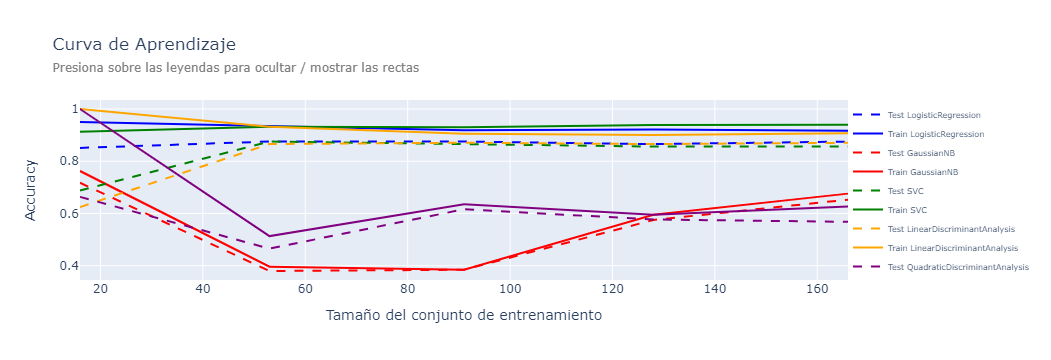

In [20]:
# Crear una lista con los resultados de Learning Curve de diferentes modelos
learning_scores = [dfLearningCurve_log, dfLearningCurve_nb, dfLearningCurve_svc, dfLearningCurve_lda, dfLearningCurve_qda]

# Concatenar los resultados de Learning Curve en un solo DataFrame
df_learning = pd.concat(learning_scores, axis=0)

# Crear una lista vacía para almacenar las trazas de los modelos
traces = []

# Definir una lista de colores para las líneas
colors = ['blue', 'red', 'green', 'orange', 'purple']

# Iterar sobre los modelos únicos en el DataFrame df_learning
# Cada modelo representa una capa en el gráfico Learning rate
for i, model in enumerate(df_learning['Classifier'].unique()):
    # Filtrar los datos del modelo actual
    model_data = df_learning[df_learning['Classifier'] == model]

    # Crear una traza para el modelo actual
    testTrace = go.Scatter(
        x=model_data['train_sizes'],
        y=model_data['test_scores'],
        mode='lines',
        name=f'Test {model}',
        line=dict(color=colors[i], dash='dash')
    )
    
    # Agregar la traza a la lista de trazas
    traces.append(testTrace)
    
    # Crear una traza para el modelo actual
    trainTrace = go.Scatter(
        x=model_data['train_sizes'],
        y=model_data['train_scores'],
        mode='lines',
        line=dict(color=colors[i]),
        name=f'Train {model}'
    )
    
    # Agregar la traza a la lista de trazas
    traces.append(trainTrace)


# Definir el diseño del gráfico
layout = go.Layout(
    title='Curva de Aprendizaje',
    xaxis=dict(title='Tamaño del conjunto de entrenamiento'),
    yaxis=dict(title='Accuracy'),
    showlegend=True,
    legend=dict(x=1, y=0.5, font=dict(size=8)),
    height=600,
    width=900
)

# Añade un subtítulo
layout['title']['text'] += '<br><span style="font-size: 12px; color: gray;">Presiona sobre las leyendas para ocultar / mostrar las rectas</span>'

# Crear la figura del gráfico con las trazas y el diseño
fig = go.Figure(data=traces, layout=layout)

# Mostrar el gráfico
fig.show()

Al observar los clasificadores Naive Bayes y QDA, se nota que el mayor accuracy se obtiene con conjuntos de entrenamiento pequeños, con valores de 0.76 y 1, respectivamente. Sin embargo, al aumentar el tamaño del conjunto de entrenamiento a 50 datos, el accuracy disminuye notablemente a 0.37 y 0.51, respectivamente. Posteriormente, al aumentar aún más el conjunto de entrenamiento, se observa un aumento en el accuracy, llegando a niveles cercanos a 0.62.

Por otro lado, el modelo logístico mantiene un nivel de accuracy constante en todos los tamaños del conjunto de entrenamiento. No obstante, el accuracy del conjunto de prueba no mejora. Esto indica que posiblemente sea necesario aumentar la cantidad de datos para que el modelo logístico pueda generalizar de manera adecuada.

En cuanto a los modelos SVC y LDA, muestran niveles altos y constantes de accuracy en todos los tamaños del conjunto de entrenamiento. Es importante destacar que el accuracy de los datos de prueba aumenta ligeramente, lo cual indica que los clasificadores aprenden de manera relativamente buena a medida que se incrementa el tamaño del conjunto de entrenamiento. Sin embargo, no se logra alcanzar un accuracy constante entre los datos de entrenamiento y de prueba. Al igual que el clasificador logístico, es posible que al aumentar la cantidad de datos se pueda mejorar la clasificación de manera más efectiva.

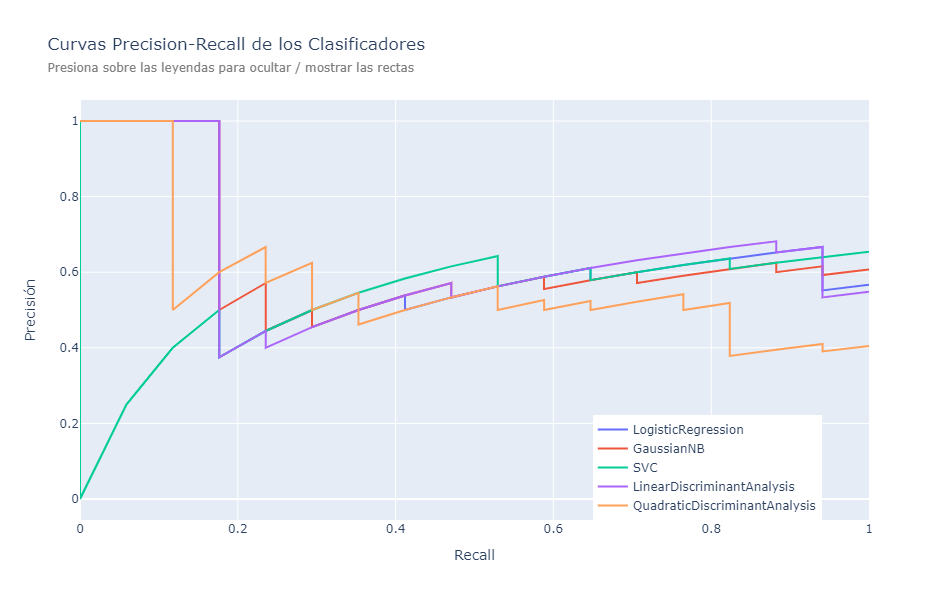

In [18]:
# Crear una lista con los resultados de PRC de diferentes modelos
prc_scores = [dfPRC_log, dfPRC_nb, dfPRC_svc, dfPRC_lda, dfPRC_qda]

# Concatenar los resultados de PRC en un solo DataFrame
df_prc = pd.concat(prc_scores, axis=0)

# Crear una lista vacía para almacenar las trazas de los modelos
traces = []

# Iterar sobre los modelos únicos en el DataFrame df_prc
# Cada modelo representa una capa en el gráfico PRC
for model in df_prc['Classifier'].unique():
    # Filtrar los datos del modelo actual
    model_data = df_prc[df_prc['Classifier'] == model]

    # Crear una traza para el modelo actual
    trace = go.Scatter(
        x=model_data['Recall'],
        y=model_data['Precision'],
        mode='lines',
        name=f'{model}'
    )
    # Agregar la traza a la lista de trazas
    traces.append(trace)

# Definir el diseño del gráfico
layout = go.Layout(
    title='Curvas Precision-Recall de los Clasificadores',
    xaxis=dict(title='Recall'),
    yaxis=dict(title='Precisión'),
    showlegend=True,
    legend=dict(x=0.65, y=0.0),
    height=600,
    width=700
)

# Añade un subtítulo
layout['title']['text'] += '<br><span style="font-size: 12px; color: gray;">Presiona sobre las leyendas para ocultar / mostrar las rectas</span>'

# Crear la figura del gráfico con las trazas y el diseño
fig = go.Figure(data=traces, layout=layout)

# Mostrar el gráfico
fig.show()

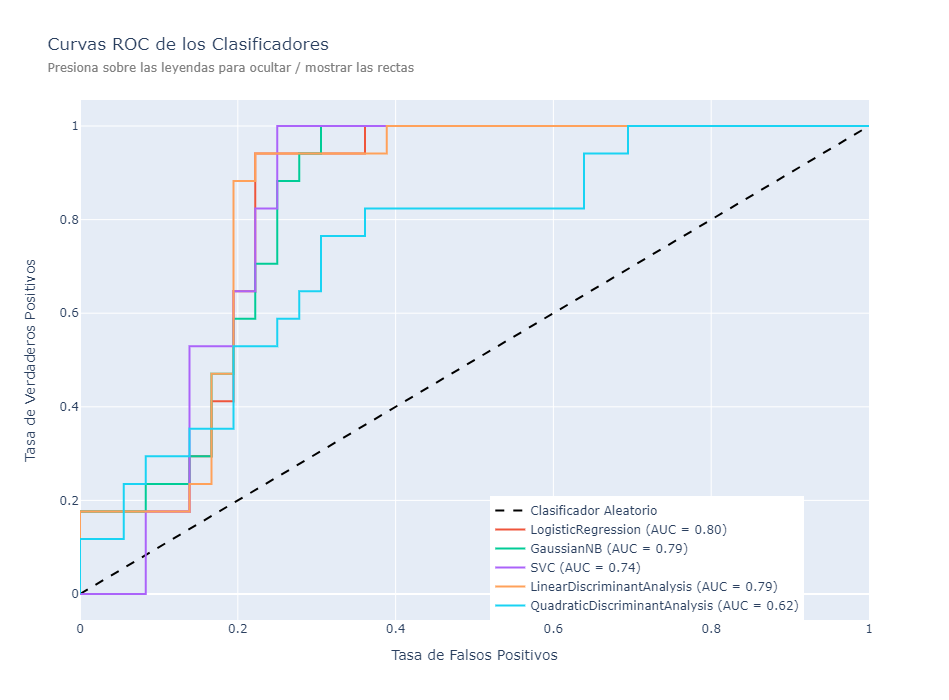

In [21]:
# Crear una lista con los resultados de ROC de diferentes modelos
roc_scores = [dfRoc_log, dfRoc_nb, dfRoc_svc, dfRoc_lda, dfRoc_qda]

# Concatenar los resultados de ROC en un solo DataFrame
df_roc = pd.concat(roc_scores, axis=0)

# Crear una línea diagonal para el clasificador aleatorio en el gráfico
diagonal_line = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Clasificador Aleatorio',
    line=dict(color='black', dash='dash')
)

# Crear una lista vacía para almacenar las capas de los modelos
capas = []

# Iterar sobre los modelos únicos en el DataFrame df_roc
# Cada modelo representa una capa en el gráfico ROC
for model in df_roc['Classifier'].unique():
    # Filtrar los datos del modelo actual
    model_data = df_roc[df_roc['Classifier'] == model]
    # Obtener el valor de ROC-AUC para el modelo
    roc_auc = model_data['roc-auc'].iloc[0]

    # Crear una capa para el modelo actual
    capa = go.Scatter(
        x=model_data['FPR'],
        y=model_data['TPR'],
        mode='lines',
        name=f'{model} (AUC = {roc_auc:.2f})'
    )
    # Agregar la capa a la lista de capas
    capas.append(capa)

# Definir el diseño del gráfico
layout = go.Layout(
    title='Curvas ROC de los Clasificadores',
    xaxis=dict(title='Tasa de Falsos Positivos'),
    yaxis=dict(title='Tasa de Verdaderos Positivos'),
    showlegend=True,
    legend=dict(x=0.52, y=0.0),
    height=700,
    width=800
)

# Añade un subtítulo
layout['title']['text'] += '<br><span style="font-size: 12px; color: gray;">Presiona sobre las leyendas para ocultar / mostrar las rectas</span>'

# Crear la figura del gráfico con las capas y el diseño
fig = go.Figure(data=[diagonal_line] + capas, layout=layout)

# Mostrar el gráfico
fig.show()

Al observar la curva ROC, notamos que la regresión logística, el LDA y Naive Bayes son los clasificadores con menor tasa de falsos positivos y mayor tasa de verdaderos positivos. Por otro lado, el clasificador QDA presenta la mayor tasa de falsos positivos y la menor tasa de verdaderos positivos. Esto indica que los tres primeros clasificadores tienen un mejor rendimiento en la capacidad de distinguir entre las clases positiva y negativa, mientras que el clasificador QDA tiene una tasa más alta de clasificar erróneamente ejemplos negativos como positivos.

Por otro lado, al observar la curva de Precisión-Recall, notamos que el QDA presenta valores más bajos de precisión cuando el Recall es mayor a 0.4, lo que indica que puede tener una mayor proporción de falsos positivos. Los demás clasificadores son similares en términos de Precisión-Recall.

## Conclusión

Para predecir la presencia o ausencia de angina luego de hacer ejercicio, se utilizaron 5 clasificadores, Naive Bayes, SVC, LDA, QDA y regresión Logística. En términos de calidad de clasificador general, la regresión logística es el que presenta mejor rendimiento, dado que tiene valores altos en cada una de las métricas, sin embargo, se puede mejorar al aumentar el tamaño de muestra se puede mejorar su desempeño.

Del mismo modo, es importante observar los clasificadores SVC y LDA, los cuales presentan métricas con valores altos y buena capacidad de aprendizaje a medida que aumenta el tamaño del conjunto de entrenamiento. Sin embargo, el clasificador SVC presenta menor area bajo la curva ROC, lo cual indica mayor tasa de falsos positivos y/o menortasa de verdaderos positivos en comparación con el clasificador LDA o regresión logística.

Ahora bien, el clasificador QDA y Naive Bayes clasificaron todas las instancias positivas correctas, sin embargo, los niveles de accuracy, precision y Area bajo la curva ROC son menores que los demas clasificadores, por lo que es posible que no tengan la capacidad para generalizar la presencia de angina y tengan problemas al clasificar correctamente las instancais negativas. Esto se puede mejorar bajando el umbral a la hora de clasificar los datos.